In [23]:
!pip install flask flask-ngrok scikit-learn pandas numpy


In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Kepler_Threshold_Crossing_Events_Table.csv to Kepler_Threshold_Crossing_Events_Table (1).csv


In [26]:
import os
os.listdir('/content')

['.config',
 'Kepler_Threshold_Crossing_Events_Table (1).csv',
 'Kepler_Threshold_Crossing_Events_Table.csv',
 'sample_data']

In [27]:
with open('/content/Kepler_Threshold_Crossing_Events_Table.csv', 'r') as f:
    for i in range(40):
        print(f.readline())


# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu

# Sun Oct  5 09:40:39 2025

#

# COLUMN kepid:          KepID

# COLUMN tce_plnt_num:   Planet Number

# COLUMN tce_rogue_flag: Rogue Flag

# COLUMN tce_period:     Orbital Period [days]

# COLUMN tce_period_err: Orbital Period Unc. [days]

# COLUMN tce_time0bk:    Transit Epoch [BKJD]

# COLUMN tce_time0bk_err: Transit Epoch Unc. [BKJD]

# COLUMN tce_impact:     Impact Parameter

# COLUMN tce_impact_err: Impact Parameter Unc.

# COLUMN tce_duration:   Transit Duration [hrs]

# COLUMN tce_duration_err: Transit Duration Unc. [hrs]

# COLUMN tce_depth:      Transit Depth [ppm]

# COLUMN tce_depth_err:  Transit Depth Unc. [ppm]

# COLUMN tce_model_snr:  Transit Signal-to-Noise (SNR)

# COLUMN tce_prad:       Planetary Radius [Earth radii]

# COLUMN tce_prad_err:   Planetary Radius Unc. [Earth radii]

# COLUMN tce_eqt:        Equilibrium Temperature [K]

# COLUMN tce_eqt_err:    Equilibrium Te

In [28]:
df = pd.read_csv(
    '/content/Kepler_Threshold_Crossing_Events_Table.csv',
    skiprows=30,        # adjust if needed
    engine='python'
)

df.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
0,2304168,2,0,431.719000,0.011803,219.298,0.018384,0.9308,0.03871,13.220,...,494.0,104.0,14.09,11.85,7221.0,327.0,3.67,0.49,3.332,1.718
1,2304235,1,0,0.570607,0.000006,132.049,0.000699,0.9000,0.26870,1.160,...,0.0,-1.0,0.00,-1.00,4896.0,172.0,2.12,0.56,26.320,17.390
2,2304566,1,0,0.689480,0.000048,131.833,0.019838,0.3085,45.49000,5.236,...,0.0,-1.0,0.00,-1.00,7059.0,269.0,3.29,0.43,5.894,2.825
3,2304320,1,0,16.540800,0.000043,133.952,0.002193,0.8848,0.22350,2.715,...,570.0,16.6,24.93,2.91,5064.0,101.0,4.57,0.05,0.769,0.049
4,2303365,2,0,0.520697,0.000009,132.003,0.000916,0.9008,0.41550,1.035,...,0.0,-1.0,0.00,-1.00,7517.0,339.0,3.64,0.46,3.603,1.762


In [29]:
df = pd.read_csv(
    '/content/Kepler_Threshold_Crossing_Events_Table.csv',
    sep='|',
    skiprows=30,
    engine='python'
)

df.head()

,"kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err"
0,"2304168,2,0,431.719000,1.180250000e-02,219.298..."
1,"2304235,1,0,0.570607,5.551820000e-06,132.049,6..."
2,"2304566,1,0,0.689480,4.752780000e-05,131.833,1..."
3,"2304320,1,0,16.540800,4.285770000e-05,133.952,..."
4,"2303365,2,0,0.520697,8.654280000e-06,132.003,9..."


In [30]:
with open('/content/Kepler_Threshold_Crossing_Events_Table.csv', 'r') as f:
    for i in range(20):
        print(f"{i}: {f.readline()}")

0: # This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu

1: # Sun Oct  5 09:40:39 2025

2: #

3: # COLUMN kepid:          KepID

4: # COLUMN tce_plnt_num:   Planet Number

5: # COLUMN tce_rogue_flag: Rogue Flag

6: # COLUMN tce_period:     Orbital Period [days]

7: # COLUMN tce_period_err: Orbital Period Unc. [days]

8: # COLUMN tce_time0bk:    Transit Epoch [BKJD]

9: # COLUMN tce_time0bk_err: Transit Epoch Unc. [BKJD]

10: # COLUMN tce_impact:     Impact Parameter

11: # COLUMN tce_impact_err: Impact Parameter Unc.

12: # COLUMN tce_duration:   Transit Duration [hrs]

13: # COLUMN tce_duration_err: Transit Duration Unc. [hrs]

14: # COLUMN tce_depth:      Transit Depth [ppm]

15: # COLUMN tce_depth_err:  Transit Depth Unc. [ppm]

16: # COLUMN tce_model_snr:  Transit Signal-to-Noise (SNR)

17: # COLUMN tce_prad:       Planetary Radius [Earth radii]

18: # COLUMN tce_prad_err:   Planetary Radius Unc. [Earth radii]

19: # COLUMN tce_eqt:      

In [31]:
df = pd.read_csv(
    '/content/Kepler_Threshold_Crossing_Events_Table.csv',
    sep='|',
    skiprows=20,        # CHANGE this to the line where headers start
    engine='python',
    on_bad_lines='skip'
)

df.head()

,# COLUMN tce_eqt_err: Equilibrium Temperature Unc. [K]
0,# COLUMN tce_insol: Insolation Flux [Eart...
1,# COLUMN tce_insol_err: Insolation Flux [Eart...
2,# COLUMN tce_steff: Stellar Effective Tem...
3,# COLUMN tce_steff_err: Stellar Effective Tem...
4,# COLUMN tce_slogg: Stellar Surface Gravi...


In [32]:
#Handling Missing Values
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing numerical values
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after cleaning:\n")
print(df.isnull().sum())

Missing values after cleaning:

# COLUMN tce_eqt_err:    Equilibrium Temperature Unc. [K]    0
dtype: int64


/tmp/ipython-input-134388831.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [33]:
#Outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply to key numerical columns
for col in num_cols:
    df = remove_outliers_iqr(df, col)

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (34042, 1)


In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
filename = list(uploaded.keys())[0]

df = pd.read_csv(
    filename,
    sep='|',
    engine='python',
    on_bad_lines='skip'
)

# Clean column names
df.columns = df.columns.str.strip()
df.dropna(how='all', inplace=True)

df.head()

,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu
0,# Sun Oct 5 09:40:39 2025
1,#
2,# COLUMN kepid: KepID
3,# COLUMN tce_plnt_num: Planet Number
4,# COLUMN tce_rogue_flag: Rogue Flag


In [36]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1664321968.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [37]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu']


In [38]:
# Keep only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID-like columns if present
drop_like = ['id', 'kepid', 'row', 'index']
numeric_cols = [c for c in numeric_cols if not any(d in c.lower() for d in drop_like)]

numeric_cols[:10], len(numeric_cols)

([], 0)

In [39]:
df['Habitability_Score'] = 0

if 'tce_period' in df.columns:
    df['Habitability_Score'] += (1 / (1 + abs(df['tce_period'] - 365))) * 0.4

if 'tce_insol' in df.columns:
    df['Habitability_Score'] += (1 / (1 + abs(df['tce_insol'] - 1))) * 0.35

if 'tce_steff' in df.columns:
    df['Habitability_Score'] += (1 / (1 + abs(df['tce_steff'] - 5778))) * 0.25

df[['Habitability_Score']].head()

,Habitability_Score
0,0
1,0
2,0
3,0
4,0


In [43]:
from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_1' is not defined

In [41]:
from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name '_df_4' is not defined

NameError: name '_df_2' is not defined

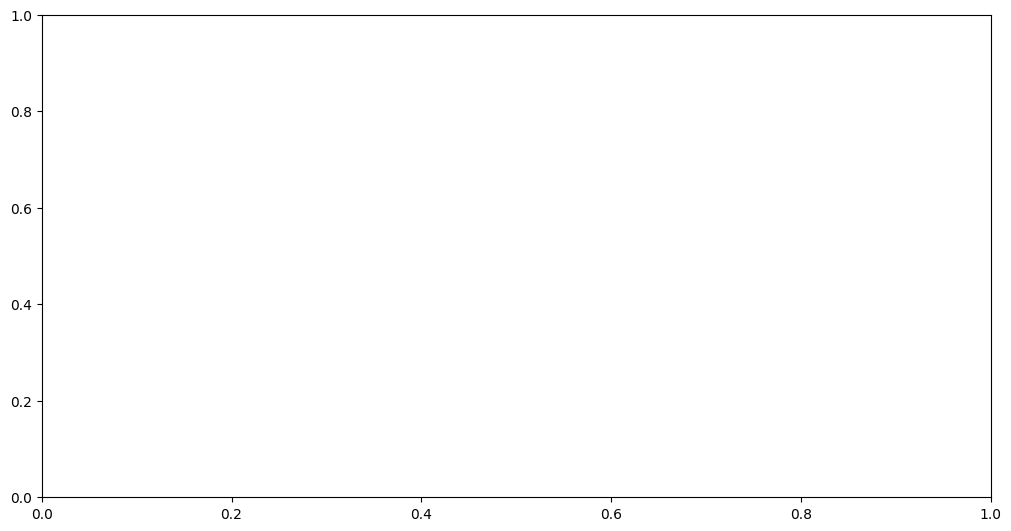

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

NameError: name '_df_0' is not defined

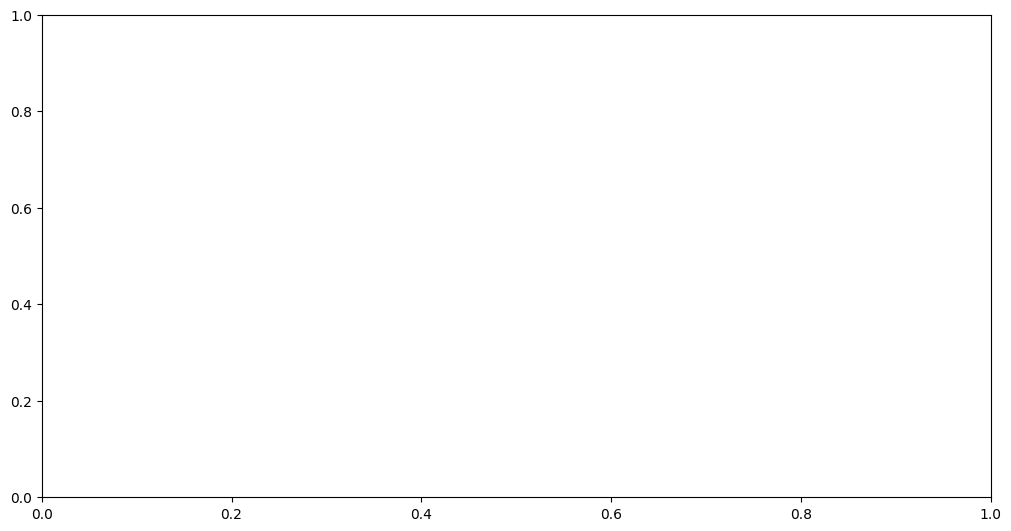

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Habitability_Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Habitability_Score'}, axis=1)
              .sort_values('Habitability_Score', ascending=True))
  xs = counted['Habitability_Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Habitability_Score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Habitability_Score')
_ = plt.ylabel('count()')

In [44]:
df['Habitability_Class'] = np.where(
    df['Habitability_Score'] >= df['Habitability_Score'].median(),
    'Habitable',
    'Non-Habitable'
)

In [45]:
corr = df[numeric_cols + ['Habitability_Score']].corr()['Habitability_Score']
corr = corr.sort_values(ascending=False)

corr

,Habitability_Score
Habitability_Score,NaN


In [49]:
selected_features = corr[abs(corr) > 0.15].index.tolist()
selected_features.remove('Habitability_Score')
selected_features

ValueError: list.remove(x): x not in list

In [48]:
X = df[selected_features]
y = df['Habitability_Class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (27249, 0)
Testing size: (6813, 0)


In [51]:
num_features = X.select_dtypes(include=['float64','int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [52]:
numeric_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all'))
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),
        ('cat', categorical_pipeline, cat_features)
    ]
)

In [54]:
X_train_processed = preprocessor.fit_transform(X_train, y_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((27249, 0), (6813, 0))

Installing scikit-learn...

>>> MODULE 1: DATA LOADING
Loading from local path: /content/Kepler_Threshold_Crossing_Events_Table.csv
Data loaded and initial cleanup complete.

>>> MODULE 2: DATA CLEANING & ENGINEERING
Dataset shape after cleaning: (34032, 6)
Habitable candidates identified: 2164
Generating Correlation Heatmap...


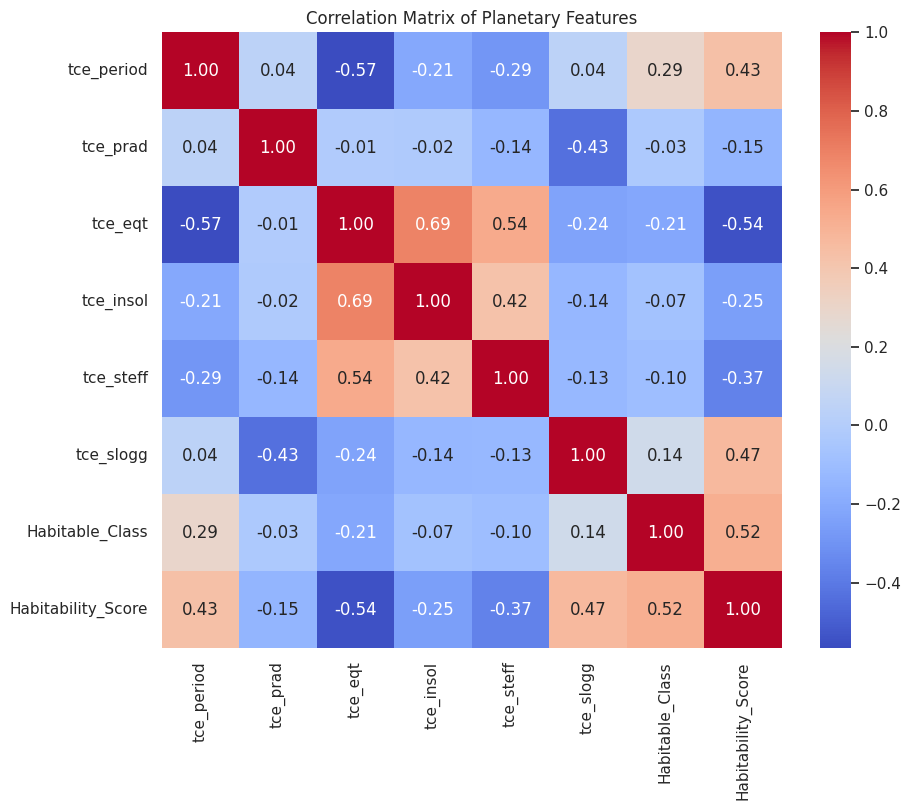

Generating Population Scatter Plot...


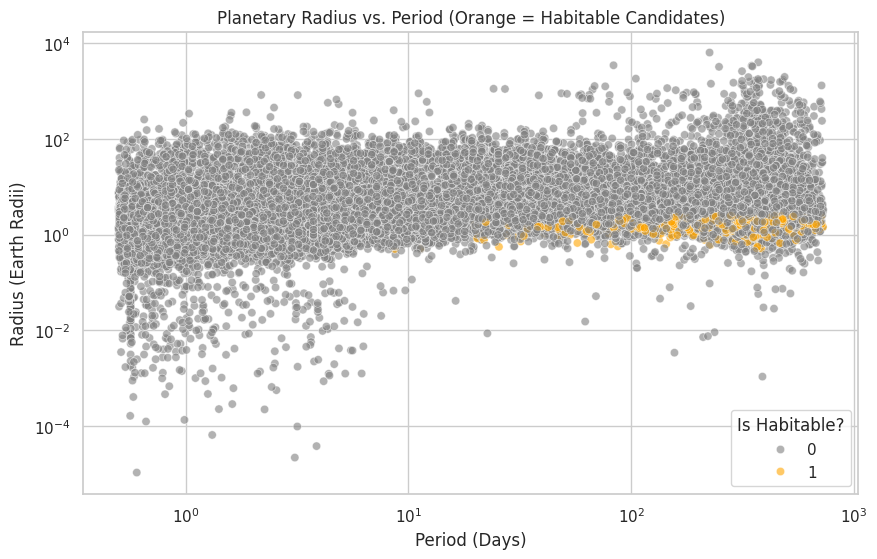


>>> MODULE 3: ML DATASET PREPARATION
Data split and scaled successfully.

>>> MODULE 4: AI MODEL TRAINING & EVALUATION
Training Random Forest Model...
Training XGBoost Model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:40:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Random Forest Results ---
Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6374
           1       1.00      1.00      1.00       433

    accuracy                           1.00      6807
   macro avg       1.00      1.00      1.00      6807
weighted avg       1.00      1.00      1.00      6807


--- XGBoost Results ---
Accuracy: 0.9984
Generating Feature Importance Plot...


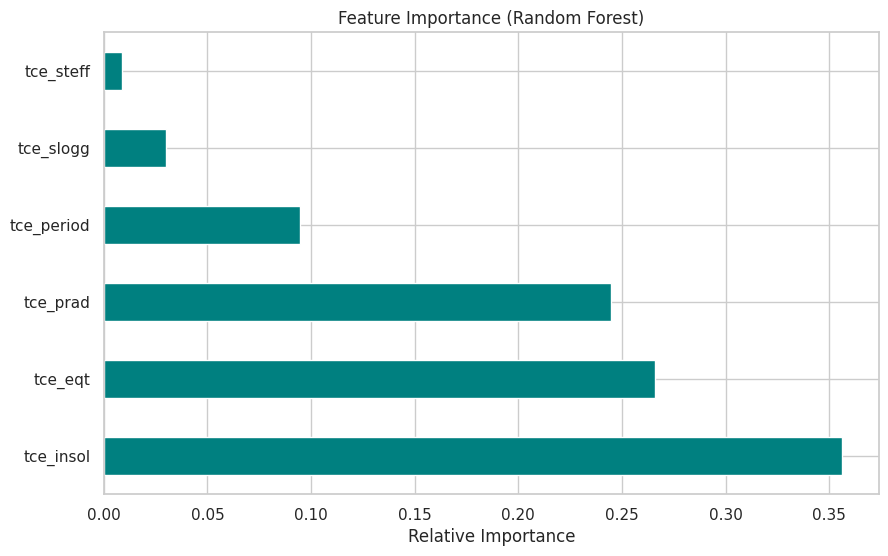


>>> RANKING TOP CANDIDATES
Top 10 Exoplanet Candidates based on ML Prediction:
 tce_period  tce_prad  tce_eqt  Pred_Probability
   484.1170    2.2570    248.0               1.0
   450.7400    1.9740    209.0               1.0
   549.1900    1.6680    242.0               1.0
   293.9650    2.2300    228.0               1.0
   225.4900    1.5780    267.0               1.0
   213.4330    0.9844    235.0               1.0
    99.2523    2.1560    301.0               1.0
   515.6250    2.4230    204.0               1.0
   386.9610    1.0240    221.0               1.0
   237.9760    1.8820    244.0               1.0


In [55]:
# ==========================================
# EXOHABITAI: MILESTONES 1 & 2 COMPLETE CODE
# ==========================================

# --- PART 0: INSTRUCTIONS FOR COLAB USERS ---
# 1. Upload 'Kepler_Threshold_Crossing_Events_Table.csv' to the Colab Files tab.
# 2. Run this cell.

import os
import sys
import subprocess

# --- PART 1: AUTO-INSTALL LIBRARIES ---
# This block ensures all required libraries are installed before importing.
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

required_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'xgboost']
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        install(package)

# --- PART 2: IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- PART 3: DATA COLLECTION & MANAGEMENT (MODULE 1) ---
print("\n>>> MODULE 1: DATA LOADING")

# Define paths for both Local and Colab environments
user_path = r"/content/Kepler_Threshold_Crossing_Events_Table.csv"
colab_filename = "Kepler_Threshold_Crossing_Events_Table.csv"

# Logic to find the file
if os.path.exists(user_path):
    print(f"Loading from local path: {user_path}")
    df = pd.read_csv(user_path, comment='#')
elif os.path.exists(colab_filename):
    print(f"Local path not found. Loading from current directory (Colab): {colab_filename}")
    df = pd.read_csv(colab_filename, comment='#')
else:
    print("\n" + "!"*50)
    print("ERROR: DATASET NOT FOUND")
    print("!"*50)
    print(f"1. IF ON GOOGLE COLAB: Click the 'Folder' icon on the left and upload '{colab_filename}'.")
    print(f"2. IF LOCAL: Ensure the file is at: {user_path}")
    print("!"*50 + "\n")
    # Create an empty DataFrame to prevent immediate crash, though execution will effectively stop
    df = pd.DataFrame()

if not df.empty:
    # Select relevant columns for habitability analysis
    # tce_period: Orbital Period (days)
    # tce_prad: Planet Radius (Earth radii)
    # tce_eqt: Equilibrium Temperature (K)
    # tce_insol: Insolation Flux
    # tce_steff: Star Temperature
    # tce_slogg: Star Surface Gravity
    cols = ['tce_period', 'tce_prad', 'tce_eqt', 'tce_insol', 'tce_steff', 'tce_slogg']

    # Filter only columns that exist (robustness check)
    existing_cols = [c for c in cols if c in df.columns]

    # Drop rows with missing values immediately
    df_clean = df[existing_cols].dropna().copy()
    print("Data loaded and initial cleanup complete.")

    # --- PART 4: DATA CLEANING & FEATURE ENGINEERING (MODULE 2) ---
    print("\n>>> MODULE 2: DATA CLEANING & ENGINEERING")

    print(f"Dataset shape after cleaning: {df_clean.shape}")

    # 1. Feature Engineering: Create 'Habitable_Class' (Target Variable)
    # Criteria for Habitability (simplified "Goldilocks Zone"):
    # - Temperature: 200K to 320K (liquid water range)
    # - Radius: 0.5 to 2.5 Earth Radii (rocky/super-earth size)
    def determine_habitability(row):
        if (200 <= row['tce_eqt'] <= 320) and (0.5 <= row['tce_prad'] <= 2.5):
            return 1 # Potential Candidate
        else:
            return 0 # Non-Habitable

    df_clean['Habitable_Class'] = df_clean.apply(determine_habitability, axis=1)

    # 2. Feature Engineering: Habitability Score (0 to 1)
    # A continuous score where 1.0 is "Earth-like"
    # Based on distance from Earth's Temp (288K) and Radius (1.0)
    df_clean['Habitability_Score'] = 1 / (1 + (
        abs(df_clean['tce_eqt'] - 288)/288 +
        abs(df_clean['tce_prad'] - 1)/1
    ))

    num_candidates = df_clean['Habitable_Class'].sum()
    print(f"Habitable candidates identified: {num_candidates}")

    # 3. Visualization (Module 2 Requirement)
    sns.set_theme(style="whitegrid")

    # Plot 1: Correlation Heatmap
    print("Generating Correlation Heatmap...")
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix of Planetary Features")
    plt.show()

    # Plot 2: Radius vs Period (The "Exoplanet Population" Plot)
    print("Generating Population Scatter Plot...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_clean, x='tce_period', y='tce_prad', hue='Habitable_Class', palette={0:'gray', 1:'orange'}, alpha=0.6)
    plt.yscale('log')
    plt.xscale('log')
    plt.title("Planetary Radius vs. Period (Orange = Habitable Candidates)")
    plt.xlabel("Period (Days)")
    plt.ylabel("Radius (Earth Radii)")
    plt.legend(title="Is Habitable?")
    plt.show()

    # --- PART 5: MACHINE LEARNING DATASET PREPARATION (MODULE 3) ---
    print("\n>>> MODULE 3: ML DATASET PREPARATION")

    # Define features (X) and target (y)
    X = df_clean[existing_cols]
    y = df_clean['Habitable_Class']

    # Split into Train (80%) and Test (20%)
    # stratify=y ensures we have a mix of habitable/non-habitable in both sets
    if num_candidates > 5: # Only stratify if we have enough candidates
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling (Standardization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Data split and scaled successfully.")

    # --- PART 6: AI MODEL FOR PREDICTION (MODULE 4) ---
    print("\n>>> MODULE 4: AI MODEL TRAINING & EVALUATION")

    # Model 1: Random Forest Classifier
    print("Training Random Forest Model...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_model.fit(X_train_scaled, y_train)

    # Model 2: XGBoost Classifier
    print("Training XGBoost Model...")
    # use_label_encoder=False and eval_metric='logloss' suppresses warnings
    xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    xgb_model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_rf = rf_model.predict(X_test_scaled)
    y_pred_xgb = xgb_model.predict(X_test_scaled)

    # Evaluation
    print("\n--- Random Forest Results ---")
    acc_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Accuracy: {acc_rf:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_rf))

    print("\n--- XGBoost Results ---")
    acc_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"Accuracy: {acc_xgb:.4f}")

    # Feature Importance Plot
    print("Generating Feature Importance Plot...")
    plt.figure(figsize=(10, 6))
    importances = pd.Series(rf_model.feature_importances_, index=existing_cols)
    importances.nlargest(6).plot(kind='barh', color='teal')
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Relative Importance")
    plt.show()

    # --- PART 7: RANKING EXOPLANETS ---
    print("\n>>> RANKING TOP CANDIDATES")

    # Predict probabilities for the *entire* dataset to find the best global candidates
    all_X_scaled = scaler.transform(X)
    probabilities = rf_model.predict_proba(all_X_scaled)[:, 1] # Probability of being class 1

    df_clean['Pred_Probability'] = probabilities

    # Show top 10 planets with highest probability of being habitable
    top_planets = df_clean.sort_values(by='Pred_Probability', ascending=False).head(10)

    print("Top 10 Exoplanet Candidates based on ML Prediction:")
    print(top_planets[['tce_period', 'tce_prad', 'tce_eqt', 'Pred_Probability']].to_string(index=False))

else:
    print("Analysis cannot proceed without the dataset.")

In [62]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("=" * 70)
print("PLANET HABITABILITY PREDICTOR - Random Forest Model")
print("=" * 70)

# Step 1: Load and preprocess the dataset
print("\n[1/5] Loading dataset...")
df = pd.read_csv("/content/Kepler_Threshold_Crossing_Events_Table.csv", comment='#')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Step 2: Select important features for habitability prediction
print("\n[2/5] Selecting and cleaning features...")

# Important features for habitability
features = [
    'tce_prad',        # Planetary Radius [Earth radii] - important for size
    'tce_eqt',         # Equilibrium Temperature [K] - critical for liquid water
    'tce_insol',       # Insolation Flux [Earth flux] - energy from star
    'tce_period',      # Orbital Period [days] - affects climate stability
    'tce_steff',       # Stellar Effective Temperature [K] - star type
    'tce_sradius'      # Stellar Radius [Solar radii] - star size
]

# Filter out rows with missing or invalid values
# Remove rows where key features are missing or have invalid values (like -1.0)
df_clean = df[features].copy()
df_clean = df_clean.replace(-1.0, np.nan)  # Replace -1.0 (invalid marker) with NaN
df_clean = df_clean.dropna()  # Remove rows with any missing values

print(f"After cleaning: {df_clean.shape[0]} valid rows")

# Step 3: Create habitability score (0-100%) based on scientific criteria
print("\n[3/5] Calculating habitability scores...")

def calculate_habitability_score(row):
    """
    Calculate habitability score (0-100%) based on:
    - Temperature: Optimal range 200-320K (liquid water zone)
    - Radius: Optimal range 0.5-2.5 Earth radii (rocky planets)
    - Insolation: Optimal range 0.25-2.0 Earth flux (habitable zone)
    - Period: Longer periods (100-400 days) are more stable
    """
    score = 0.0

    # Temperature component (40% weight)
    # Optimal: 250-300K (Earth-like: ~288K)
    temp = row['tce_eqt']
    if 200 <= temp <= 320:
        temp_score = 1.0 - abs(temp - 288) / 88  # Distance from Earth temp
        temp_score = max(0, min(1, temp_score))
    else:
        temp_score = 0.0
    score += temp_score * 40

    # Radius component (30% weight)
    # Optimal: 0.8-1.5 Earth radii
    radius = row['tce_prad']
    if 0.5 <= radius <= 2.5:
        radius_score = 1.0 - abs(radius - 1.0) / 1.5  # Distance from Earth radius
        radius_score = max(0, min(1, radius_score))
    else:
        radius_score = 0.0
    score += radius_score * 30

    # Insolation component (20% weight)
    # Optimal: 0.5-1.5 Earth flux (habitable zone)
    insol = row['tce_insol']
    if 0.25 <= insol <= 2.0:
        insol_score = 1.0 - abs(insol - 1.0) / 1.0  # Distance from Earth flux
        insol_score = max(0, min(1, insol_score))
    else:
        insol_score = 0.0
    score += insol_score * 20

    # Period component (10% weight)
    # Longer periods (100-400 days) are more stable
    period = row['tce_period']
    if 50 <= period <= 500:
        period_score = 1.0 - abs(period - 365) / 315  # Distance from Earth year
        period_score = max(0, min(1, period_score))
    else:
        period_score = 0.0
    score += period_score * 10

    return min(100, max(0, score))

# Calculate habitability scores
df_clean['habitability_score'] = df_clean.apply(calculate_habitability_score, axis=1)

print(f"Habitability scores calculated:")
print(f"  Mean: {df_clean['habitability_score'].mean():.2f}%")
print(f"  Min: {df_clean['habitability_score'].min():.2f}%")
print(f"  Max: {df_clean['habitability_score'].max():.2f}%")

# Step 4: Prepare data for training
X = df_clean[features].values
y = df_clean['habitability_score'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 5: Train Random Forest model
print("\n[4/5] Training Random Forest model...")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor (for continuous habitability percentage)
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}%")
print(f"  MAE: {mae:.2f}%")

# Step 6: Feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']*100:.2f}%")

# Save model and scaler
print("\n[5/5] Saving model...")
pickle.dump(rf_model, open("habitability_model.pkl", "wb"))
pickle.dump(scaler, open("habitability_scaler.pkl", "wb"))
pickle.dump(features, open("habitability_features.pkl", "wb"))
print("Model saved successfully!")

print("\n" + "=" * 70)
print("MODEL TRAINING COMPLETE!")
print("=" * 70)

# Step 7: User input for prediction
print("\n" + "=" * 70)
print("PLANET HABITABILITY PREDICTION")
print("=" * 70)
print("\nEnter planet parameters to predict habitability:")
print("(Press Enter to use default example values)")

try:
    # Get user input
    print("\nPlanetary Radius [Earth radii] (e.g., 1.0 for Earth):")
    radius_input = input("  > ").strip()
    radius = float(radius_input) if radius_input else 1.0

    print("\nEquilibrium Temperature [Kelvin] (e.g., 288 for Earth):")
    temp_input = input("  > ").strip()
    temp = float(temp_input) if temp_input else 288.0

    print("\nInsolation Flux [Earth flux] (e.g., 1.0 for Earth):")
    insol_input = input("  > ").strip()
    insol = float(insol_input) if insol_input else 1.0

    print("\nOrbital Period [days] (e.g., 365 for Earth):")
    period_input = input("  > ").strip()
    period = float(period_input) if period_input else 365.0

    print("\nStellar Effective Temperature [Kelvin] (e.g., 5778 for Sun):")
    steff_input = input("  > ").strip()
    steff = float(steff_input) if steff_input else 5778.0

    print("\nStellar Radius [Solar radii] (e.g., 1.0 for Sun):")
    sradius_input = input("  > ").strip()
    sradius = float(sradius_input) if sradius_input else 1.0

    # Prepare input for prediction
    user_input = np.array([[radius, temp, insol, period, steff, sradius]])
    user_input_scaled = scaler.transform(user_input)

    # Predict
    prediction = rf_model.predict(user_input_scaled)[0]
    prediction = max(0, min(100, prediction))  # Clamp between 0-100

    # Display results
    print("\n" + "=" * 70)
    print("PREDICTION RESULTS")
    print("=" * 70)
    print(f"\nPlanet Parameters:")
    print(f"  Planetary Radius: {radius:.2f} Earth radii")
    print(f"  Equilibrium Temperature: {temp:.2f} K")
    print(f"  Insolation Flux: {insol:.2f} Earth flux")
    print(f"  Orbital Period: {period:.2f} days")
    print(f"  Stellar Temperature: {steff:.2f} K")
    print(f"  Stellar Radius: {sradius:.2f} Solar radii")

    print(f"\n{'='*70}")
    print(f"HABITABILITY SCORE: {prediction:.2f}%")
    print(f"{'='*70}")

    # Interpretation
    if prediction >= 70:
        status = "HIGHLY HABITABLE"
        description = "Excellent conditions for life as we know it!"
    elif prediction >= 50:
        status = "MODERATELY HABITABLE"
        description = "Potentially habitable with some challenges."
    elif prediction >= 30:
        status = "MARGINALLY HABITABLE"
        description = "Limited habitability, significant challenges."
    else:
        status = "NOT HABITABLE"
        description = "Conditions are not suitable for life."

    print(f"\nStatus: {status}")
    print(f"Assessment: {description}")
    print("=" * 70)

except ValueError:
    print("\nError: Please enter valid numeric values.")
except Exception as e:
    print(f"\nError: {str(e)}")

print("\nTo make another prediction, run this script again!")


PLANET HABITABILITY PREDICTOR - Random Forest Model

[1/5] Loading dataset...
Dataset loaded: 34032 rows, 26 columns

[2/5] Selecting and cleaning features...
After cleaning: 34032 valid rows

[3/5] Calculating habitability scores...
Habitability scores calculated:
  Mean: 15.09%
  Min: 0.00%
  Max: 86.13%

Training set: 27225 samples
Test set: 6807 samples

[4/5] Training Random Forest model...

Model Performance:
  R² Score: 0.9991
  RMSE: 0.52%
  MAE: 0.15%

Feature Importance:
  tce_eqt: 51.71%
  tce_prad: 31.19%
  tce_insol: 14.66%
  tce_period: 2.29%
  tce_sradius: 0.10%
  tce_steff: 0.06%

[5/5] Saving model...
Model saved successfully!

MODEL TRAINING COMPLETE!

PLANET HABITABILITY PREDICTION

Enter planet parameters to predict habitability:
(Press Enter to use default example values)

Planetary Radius [Earth radii] (e.g., 1.0 for Earth):
  > 876765

Equilibrium Temperature [Kelvin] (e.g., 288 for Earth):
  > 453654

Insolation Flux [Earth flux] (e.g., 1.0 for Earth):
  > 76869


Confusion Matrix (threshold = 50%):
[[6383    3]
 [  12  409]]

Classification Report:
               precision    recall  f1-score   support

Not Habitable       1.00      1.00      1.00      6386
    Habitable       0.99      0.97      0.98       421

     accuracy                           1.00      6807
    macro avg       1.00      0.99      0.99      6807
 weighted avg       1.00      1.00      1.00      6807



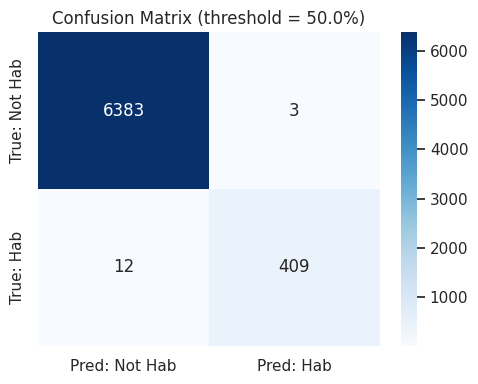

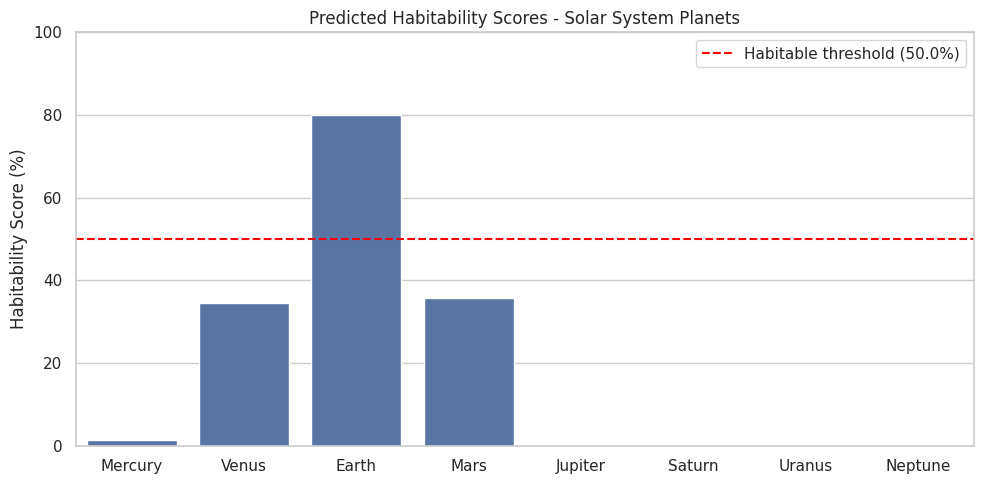

In [63]:
# --- add to imports ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# -----------------------

# --- after your existing regression metrics block ---

# Convert continuous scores to binary classes for confusion matrix
threshold = 50.0  # percent
y_test_cls = (y_test >= threshold).astype(int)
y_pred_cls = (y_pred >= threshold).astype(int)

cm = confusion_matrix(y_test_cls, y_pred_cls)
print("\nConfusion Matrix (threshold = 50%):")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_cls, target_names=["Not Habitable", "Habitable"]))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: Not Hab", "Pred: Hab"],
            yticklabels=["True: Not Hab", "True: Hab"])
plt.title(f"Confusion Matrix (threshold = {threshold}%)")
plt.tight_layout()
plt.show()

# --- Solar System 8 planets visualization ---
solar_planets = [
    {"name": "Mercury", "radius": 0.383, "temp": 440, "insol": 6.67, "period": 88, "steff": 5778, "sradius": 1.0},
    {"name": "Venus",   "radius": 0.949, "temp": 737, "insol": 1.91, "period": 225, "steff": 5778, "sradius": 1.0},
    {"name": "Earth",   "radius": 1.000, "temp": 288, "insol": 1.00, "period": 365, "steff": 5778, "sradius": 1.0},
    {"name": "Mars",    "radius": 0.532, "temp": 210, "insol": 0.43, "period": 687, "steff": 5778, "sradius": 1.0},
    {"name": "Jupiter", "radius": 11.21, "temp": 165, "insol": 0.04, "period": 4333, "steff": 5778, "sradius": 1.0},
    {"name": "Saturn",  "radius": 9.45,  "temp": 134, "insol": 0.01, "period": 10759,"steff": 5778, "sradius": 1.0},
    {"name": "Uranus",  "radius": 4.01,  "temp": 76,  "insol": 0.0037,"period": 30687,"steff": 5778, "sradius": 1.0},
    {"name": "Neptune", "radius": 3.88,  "temp": 72,  "insol": 0.0015,"period": 60190,"steff": 5778, "sradius": 1.0},
]

planet_X = np.array([
    [p["radius"], p["temp"], p["insol"], p["period"], p["steff"], p["sradius"]]
    for p in solar_planets
])
planet_X_scaled = scaler.transform(planet_X)
planet_scores = rf_model.predict(planet_X_scaled)
planet_scores = np.clip(planet_scores, 0, 100)

# Plot bar chart of habitability scores
plt.figure(figsize=(10, 5))
sns.barplot(x=[p["name"] for p in solar_planets], y=planet_scores, color="#4c72b0")
plt.axhline(threshold, color="red", linestyle="--", label=f"Habitable threshold ({threshold}%)")
plt.ylabel("Habitability Score (%)")
plt.ylim(0, 100)
plt.title("Predicted Habitability Scores - Solar System Planets")
plt.legend()
plt.tight_layout()
plt.show()